In [ ]:
from segment_anything import SamPredictor, sam_model_registry, SamAutomaticMaskGenerator
sam = sam_model_registry["vit_h"](checkpoint="/home/julius/models/sam_vit_h_4b8939.pth")
predictor = SamPredictor(sam)
predictor.set_image('Datasets/Replica/room0/results/frame000001.jpg')
masks, _, _ = predictor.predict()

In [1]:
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [70]:
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor


sam_checkpoint = "/home/julius/models/sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

mask_generator = SamAutomaticMaskGenerator(sam)

In [71]:
import cv2
image = '/home/julius/Project/nice-slam/Datasets/Replica/room0/results/frame000000.jpg'
image = cv2.imread(image)
print(image.shape)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

masks = mask_generator.generate(image)
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.imshow(image)
show_anns(masks)
plt.annotate('25, 50', xy=(100,100), xycoords='data',
             xytext=(0.5, 0.5), textcoords='figure fraction',
             arrowprops=dict(arrowstyle="->"))
plt.scatter(100,100, s=500, c='red', marker='o')
plt.axis('off')
plt.show() 

(680, 1200, 3)


In [74]:
import numpy as np
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

In [21]:
for m in masks:
    print(m.keys())

dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])
dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])
dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])
dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])
dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])
dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])
dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])
dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])
dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])
dict_keys(['segmentation', '

In [25]:
masks[0]

{'segmentation': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ..., False, False, False]]),
 'area': 25700,
 'bbox': [953, 546, 246, 133],
 'predicted_iou': 1.0220232009887695,
 'point_coords': [[956.25, 626.875]],
 'stability_score': 0.9908552169799805,
 'crop_box': [0, 0, 1200, 680]}

In [37]:
def masks2encoding(masks):
    onehot = np.zeros((masks[0]['segmentation'].shape[0], masks[0]['segmentation'].shape[1], len(masks)))
    for i, e in enumerate(masks):
        encoding = e['segmentation']
        onehot[...,i] = encoding
    return np.argmax(onehot, axis=-1)

In [29]:
onehot = np.zeros((masks[0]['segmentation'].shape[0], masks[0]['segmentation'].shape[1], len(masks)))
for i, e in enumerate(masks):
    encoding = e['segmentation']
    onehot[...,i] = encoding
print(np.argmax(onehot, axis=-1))

[[0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 [1 1 1 ... 2 2 2]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [30]:
id = np.argmax(onehot, axis=-1)

In [32]:
np.save('/home/julius/Project/nice-slam/segmentation/data/room0/seg000001.npy', id)

In [35]:
def path2instances(path, mask_generator):
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    masks = mask_generator.generate(image)
    instances = masks2encoding(masks)
    return instances

In [38]:
path = '/home/julius/Project/nice-slam/Datasets/Replica/room0/results/frame000001.jpg'
path2instances(path, mask_generator)

array([[0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 2, 2],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [8]:
paths = ['/home/julius/Project/nice-slam/Datasets/Replica/room0/results/frame000000.jpg','/home/julius/Project/nice-slam/Datasets/Replica/room0/results/frame000005.jpg','/home/julius/Project/nice-slam/Datasets/Replica/room0/results/frame000010.jpg','/home/julius/Project/nice-slam/Datasets/Replica/room0/results/frame000015.jpg','/home/julius/Project/nice-slam/Datasets/Replica/room0/results/frame000020.jpg','/home/julius/Project/nice-slam/Datasets/Replica/room0/results/frame000025.jpg']
paths

['/home/julius/Project/nice-slam/Datasets/Replica/room0/results/frame000000.jpg',
 '/home/julius/Project/nice-slam/Datasets/Replica/room0/results/frame000005.jpg',
 '/home/julius/Project/nice-slam/Datasets/Replica/room0/results/frame000010.jpg',
 '/home/julius/Project/nice-slam/Datasets/Replica/room0/results/frame000015.jpg',
 '/home/julius/Project/nice-slam/Datasets/Replica/room0/results/frame000020.jpg',
 '/home/julius/Project/nice-slam/Datasets/Replica/room0/results/frame000025.jpg']

In [4]:
import create_instance_seg as cis
import os

In [3]:
sam = cis.create_sam()

In [11]:
for path in paths:
    instances = cis.path2instances(path, sam)
    save_path = os.path.join('/home/julius/Project/nice-slam/segmentation/data/room0', path.split("/")[-1].replace("frame","seg").replace("jpg", "npy"))
    print(save_path)
    cis.instance_encoding2file(instances, save_path)

/home/julius/Project/nice-slam/segmentation/data/room0/seg000000.npy
/home/julius/Project/nice-slam/segmentation/data/room0/seg000005.npy
/home/julius/Project/nice-slam/segmentation/data/room0/seg000010.npy
/home/julius/Project/nice-slam/segmentation/data/room0/seg000015.npy
/home/julius/Project/nice-slam/segmentation/data/room0/seg000020.npy
/home/julius/Project/nice-slam/segmentation/data/room0/seg000025.npy


Backproject

In [5]:
import torch
import numpy as np
import cv2

In [2]:
path_to_traj = "/home/julius/Project/nice-slam/Datasets/Replica/room0/traj.txt"
path_to_frames = "/home/julius/Project/nice-slam/Datasets/Replica/room0/results/"

# caution: path[0] is reserved for script path (or '' in REPL)
scale = 1
args = None

T_wc = np.loadtxt(path_to_traj).reshape(-1, 4, 4)
print(T_wc[0])

[[-3.20569622e-01  4.48055195e-01 -8.34554767e-01  3.45298742e+00]
 [ 9.47224956e-01  1.51635452e-01 -2.82438617e-01  4.54611013e-01]
 [ 1.07897793e-16 -8.81052344e-01 -4.73018782e-01  5.93628545e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [3]:
def readDepth(filepath):
    depth=cv2.imread(filepath, cv2.IMREAD_UNCHANGED)
    depth_data = depth.astype(np.float32) / 6553.5
    depth_data = torch.from_numpy(depth_data)
    return depth_data

In [6]:

path_to_frames = "/home/julius/Project/nice-slam/Datasets/Replica/room0/results/"
image = cv2.imread(path_to_frames + "frame000000.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
intrinsic = np.array([[600, 0.0, 599.5], [0.0, 600, 339.5], [0.0, 0.0, 1.0]])
inverse_intrinsic = np.linalg.inv(intrinsic)

print(inverse_intrinsic)
depth = readDepth(path_to_frames + "depth000000.png")
color_data = torch.from_numpy(image)

print(depth.shape)
print(color_data.shape)

[[ 0.00166667  0.         -0.99916667]
 [ 0.          0.00166667 -0.56583333]
 [ 0.          0.          1.        ]]
torch.Size([680, 1200])
torch.Size([680, 1200, 3])


In [50]:
Depthf = readDepth(path_to_frames + "depth000000.png")
Depthg = readDepth(path_to_frames + "depth000005.png")

In [51]:
K = np.array([[600, 0.0, 599.5], [0.0, 600, 339.5], [0.0, 0.0, 1.0]])
K_inv = np.array([[1/K[0,0], 0.0, -K[0,2]/K[0,0]], [0.0, 1/K[1,1], -K[1,2]/K[1,1]], [0.0, 0.0, 1.0]])

In [52]:
def T_inv(T):
    R = T[:3,:3]
    t = T[:3,3]
    T_inv = np.zeros((4,4))
    T_inv[:3,:3] = R.T
    T_inv[:3,3] = -R.T @ t
    T_inv[3,3] = 1
    return T_inv
    

In [53]:
Tf = T_wc[0]
Tg = T_wc[5]
Tf_inv = T_inv(Tf)
Tg_inv = T_inv(Tg)

In [54]:
uv = np.array([2,3])
uv

array([2, 3])

In [55]:
tmp = np.concatenate([uv, np.ones(1)])
tmp

array([2., 3., 1.])

In [56]:
tmp = K_inv @ tmp
tmp

array([-0.99583333, -0.56083333,  1.        ])

In [57]:
tmp = tmp*Depthf[uv[1], uv[0]].numpy() #real world in camera coordinates
tmp

array([-1.20423885, -0.67820314,  1.20927751])

In [58]:
tmp = np.concatenate([tmp, np.ones(1)])
tmp

array([-1.20423885, -0.67820314,  1.20927751,  1.        ])

In [59]:
tmp = Tf_inv @ tmp #real world coordinates
tmp

array([ 0.41993543, -2.80088817,  3.91544733,  1.        ])

In [60]:
tmp = Tg @ tmp
tmp

array([-1.21350888, -0.50405668,  1.15412085,  1.        ])

In [61]:
tmp = tmp[:3] #real world coordinates in camera coordinates of g
tmp

array([-1.21350888, -0.50405668,  1.15412085])

In [62]:
tmp = tmp/tmp[-1]
tmp

array([-1.05145738, -0.43674515,  1.        ])

In [63]:
tmp = K @ tmp
tmp

array([-31.37442502,  77.45290983,   1.        ])

In [64]:
tmp = tmp[:-1] #uv coordinates of g
tmp

array([-31.37442502,  77.45290983])

In [95]:
import backproject

In [96]:
Tf = T_wc[0]
Tg = T_wc[5]
Depthf = readDepth(path_to_frames + "depth000000.png")
Depthg = readDepth(path_to_frames + "depth000005.png")

In [105]:
uv = np.array([980,200])

(680, 1200, 3)


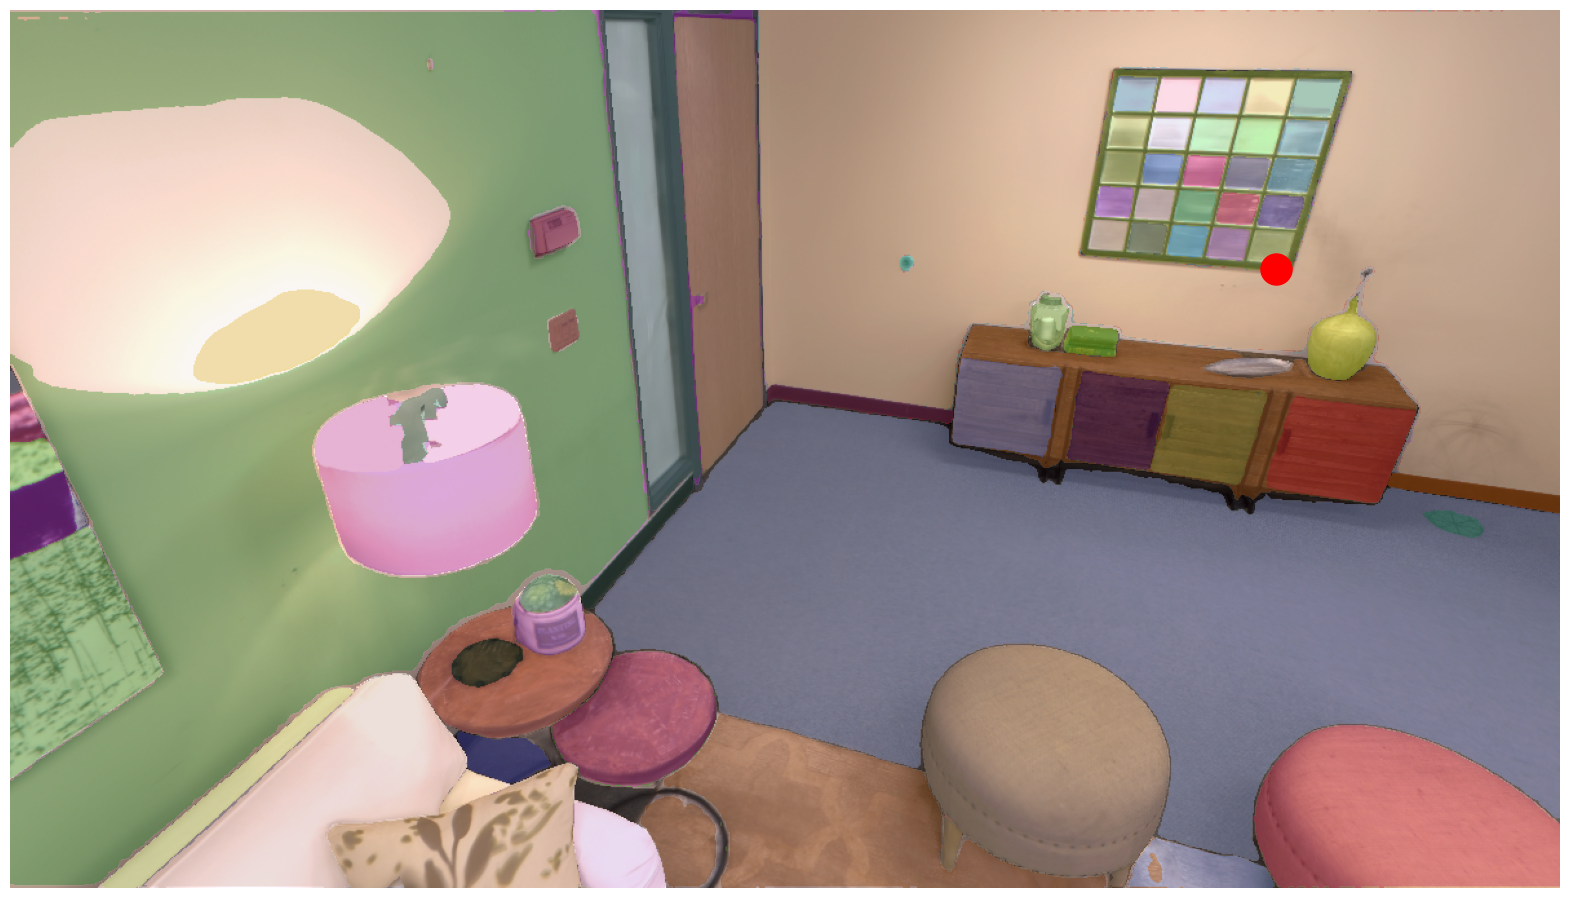

In [106]:
import cv2
image = '/home/julius/Project/nice-slam/Datasets/Replica/room0/results/frame000000.jpg'
image = cv2.imread(image)
print(image.shape)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

masks = mask_generator.generate(image)
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.imshow(image)
show_anns(masks)
plt.scatter(uv[0], uv[1], s=500, c='red', marker='o')
plt.axis('off')
plt.show() 

In [99]:
uv2 = backproject.backproject_one_uv(uv, Tf, Tg, K, Depthf, Depthg)
uv2

array([595.004652  , 315.91816117])

(680, 1200, 3)


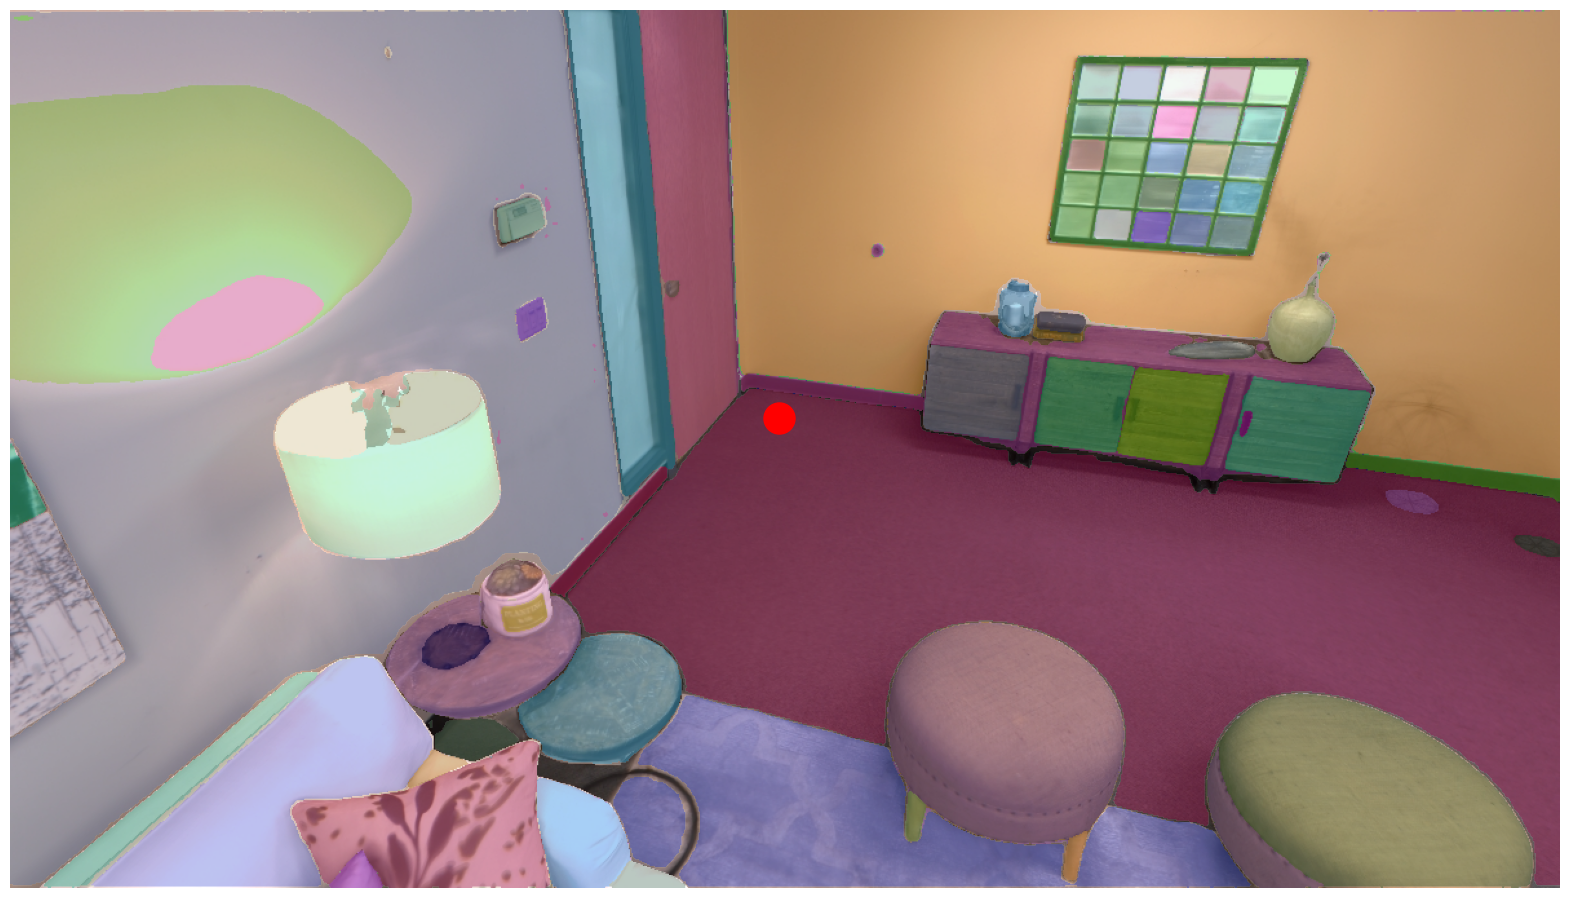

In [100]:
import cv2
image = '/home/julius/Project/nice-slam/Datasets/Replica/room0/results/frame000005.jpg'
image = cv2.imread(image)
print(image.shape)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

masks = mask_generator.generate(image)
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.imshow(image)
show_anns(masks)
plt.scatter(uv2[0], uv2[1], s=500, c='red', marker='o')
plt.axis('off')
plt.show() 